In [1]:
# resources
# https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_outbreak_in_Mainland_China
# https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_Japan
# https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_South_Korea
# https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_Italy
# https://en.wikipedia.org/wiki/2020_coronavirus_outbreak_in_Iran

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv('data.csv')

In [4]:
df.head(5)

,Date,China,Japan,Korea,Italy,Iran,Germany,US,Sweden,Norway,Spain,Netherlands,France,UK,Switzerland
0,2020-01-16,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-18,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-19,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-20,291.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols = df.drop(columns=['Date']).keys()
print(cols)

Index(['China', 'Japan', 'Korea', 'Italy', 'Iran', 'Germany', 'US', 'Sweden',
       'Norway', 'Spain', 'Netherlands', 'France', 'UK', 'Switzerland'],
      dtype='object')


In [6]:
pop = {
    'China':1.386,
    'Japan':0.126,
    'Korea':0.051,
    'Italy':0.060,
    'Iran':0.082,
    'Germany':0.082, 
    'US':0.327, 
    'Sweden':0.010,
    'Norway': 0.005,
    'Spain': 0.046,
    'Netherlands': 0.017,
    'France': 0.067,
    'UK': 0.066,
    'Switzerland': 0.008,
}

In [7]:
def m1(t, a, b):
    return a*np.exp(b*t)

In [8]:
def m2(t, a, b, c):
    return a*np.exp(b*t)/(1+c*np.exp(b*t))

In [25]:
offset = {
    'China':10,
    'Japan':25,
    'Korea':40,
    'Italy':40,
    'Iran':40,
    'Germany':44, 
    'US':44, 
    'Sweden':45,
    'Norway': 45,
    'Spain': 41,
    'Netherlands': 46,
    'France': 45,
    'UK': 45,
    'Switzerland': 45
}

China
Japan
Korea
Italy
Iran
Germany
US
Sweden
Norway
Spain
Netherlands
France
UK
Switzerland


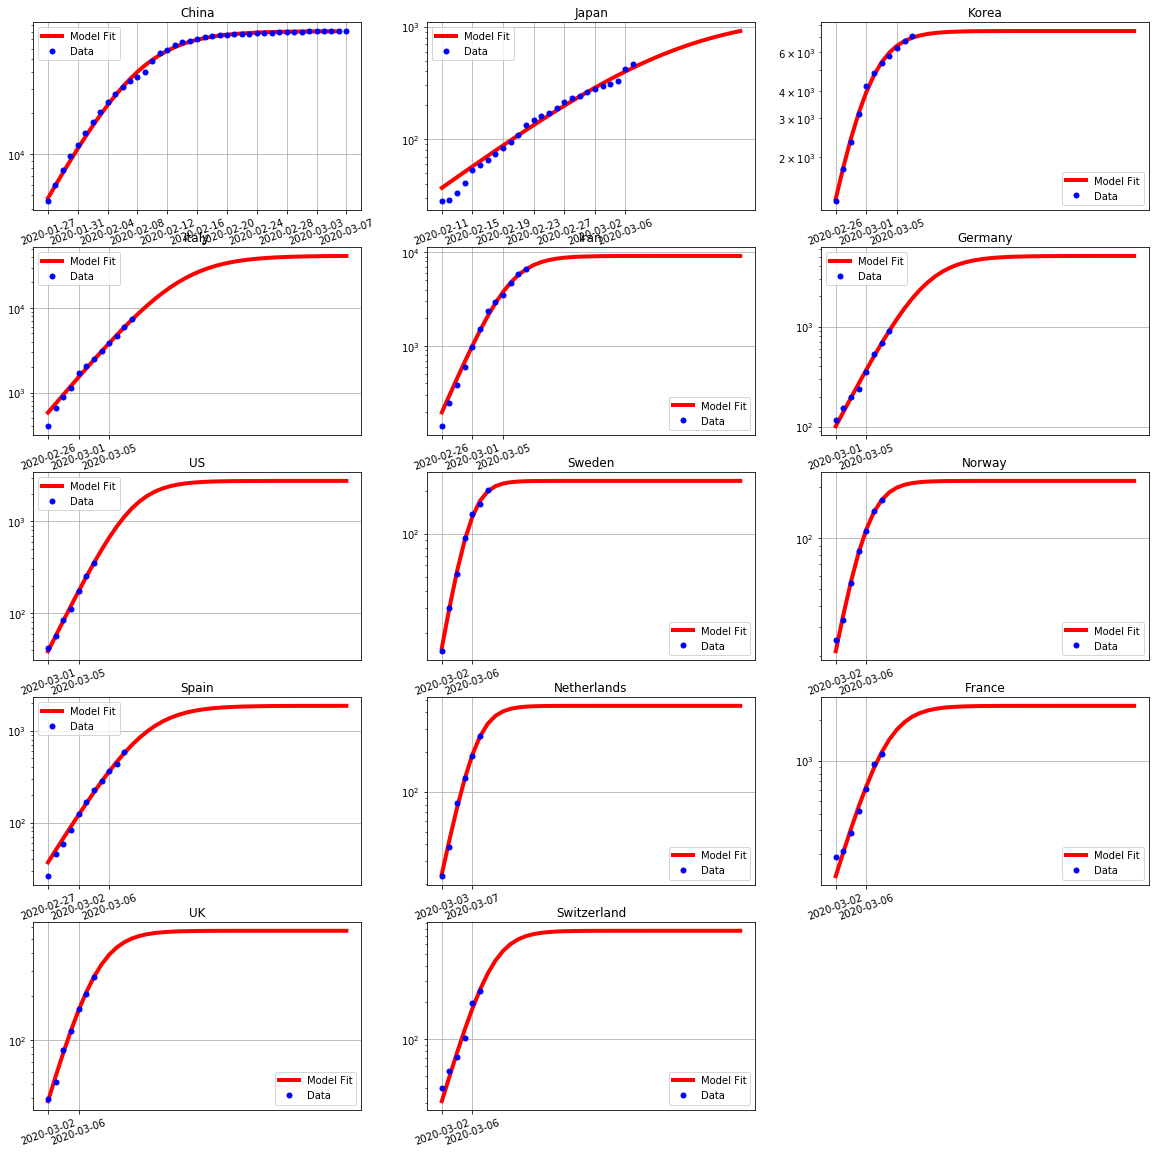

In [10]:
cols = df.drop(columns=['Date']).keys()
plt.figure(figsize=(24, 24))
popt = {}
df_pred = df.copy()
df_pred = df_pred.iloc[48:]
for ic, c in enumerate(cols):
    print(c)
    plt.subplot(np.ceil(cols.shape[0]/3), 3, ic+1)
    df_tmp = df.copy()
    df_tmp = df_tmp[['Date', c]].dropna()
    df_tmp = df_tmp.loc[df_tmp.index > offset[c]]
    df_tmp.index = df_tmp.index-df_tmp.index[0]
    t = np.arange(0, 40)
    popt[c], pcov = curve_fit(m2, df_tmp.index, df_tmp[c])
    y = m2(t, popt[c][0], popt[c][1], popt[c][2])
    y_pred = m2(df_pred[c].index-offset[c]-1, popt[c][0], popt[c][1], popt[c][2])
    df_pred[c] = np.ceil(y_pred)
    #print(popt[c])
    plt.plot(t, y, '-r', linewidth=4, label='Model Fit')
    plt.plot(df_tmp['Date'], df_tmp[c], '.b', markersize=10, label='Data')
    #plt.plot(df_pred[c].index-offset[c]-1, y_pred, '*c', markersize=10, label='Prediction')
    plt.title(c)
    plt.xticks(df_tmp['Date'].values[::4], rotation=20)
    plt.yscale('log')
    plt.grid()
    plt.legend()
plt.savefig('figs/wuhan_master.png')

In [11]:
df_per = df_pred.drop(columns=['Germany', 'France']).copy()
for c in df_pred.drop(columns=['Date', 'Germany', 'France']).columns:
    df_per[c] = df_pred[c]/pop[c]/1e6
df_per.iloc[-1]

Date           2020-03-15
China            0.058057
Japan           0.0056746
Korea            0.146294
Italy             0.37715
Iran             0.109366
US              0.0064893
Sweden             0.0236
Norway             0.0434
Spain           0.0323478
Netherlands     0.0261765
UK             0.00813636
Switzerland      0.092875
Name: 59, dtype: object

In [12]:
[(c,popt[c][0]/popt[c][2]) for c in popt.keys()]

[('China', 80485.28866036932),
 ('Japan', 1279.7831589719997),
 ('Korea', 7478.829494318094),
 ('Italy', 41396.79765454703),
 ('Iran', 9133.759305672009),
 ('Germany', 5070.8084449266125),
 ('US', 2767.9815804282907),
 ('Sweden', 235.4039548092011),
 ('Norway', 218.0367724318141),
 ('Spain', 1871.5073601048184),
 ('Netherlands', 447.832411590324),
 ('France', 2566.40175340138),
 ('UK', 565.9055095110022),
 ('Switzerland', 771.6391643441681)]

In [13]:
[(c,popt[c][0]) for c in popt.keys()]

[('China', 5072.977991419256),
 ('Japan', 38.05776256738934),
 ('Korea', 1564.446786384808),
 ('Italy', 587.2694810835137),
 ('Iran', 200.12883632030605),
 ('Germany', 102.81114101063702),
 ('US', 39.08592960298421),
 ('Sweden', 17.012179691746365),
 ('Norway', 23.794490976881868),
 ('Spain', 37.50870871750144),
 ('Netherlands', 25.23714458657966),
 ('France', 144.11393205393685),
 ('UK', 40.53352289319267),
 ('Switzerland', 32.41212326889093)]

In [14]:
[(c,2*np.pi/popt[c][1]) for c in popt.keys()]

[('China', 27.165358930887155),
 ('Japan', 55.27849717972951),
 ('Korea', 14.980641499636938),
 ('Italy', 25.458221482810313),
 ('Iran', 14.485233997858483),
 ('Germany', 18.516347352178837),
 ('US', 16.147824402957564),
 ('Sweden', 8.723772313034127),
 ('Norway', 11.001704449668834),
 ('Spain', 20.28804133826845),
 ('Netherlands', 9.711409344235594),
 ('France', 14.096398413342408),
 ('UK', 14.745564456172739),
 ('Switzerland', 12.745706994135597)]

In [15]:
[(c,popt[c][2]) for c in popt.keys()]

[('China', 0.06302987882451583),
 ('Japan', 0.02973766477592944),
 ('Korea', 0.20918337389204666),
 ('Italy', 0.014186350499481401),
 ('Iran', 0.021910894476497456),
 ('Germany', 0.020275098562143566),
 ('US', 0.014120733273426058),
 ('Sweden', 0.07226802840052124),
 ('Norway', 0.10913063292717305),
 ('Spain', 0.0200419776684184),
 ('Netherlands', 0.05635399299697526),
 ('France', 0.05615408104476841),
 ('UK', 0.07162595559145131),
 ('Switzerland', 0.042004248574446915)]

In [16]:
#df_pred.drop(columns=['Germany', 'Netherlands', 'France']).to_csv('Predictions_of_infected_2020-March-05.csv')
df_pred.to_csv('Predictions_of_infected_2020-March-05.csv')

In [17]:
df_pred

,Date,China,Japan,Korea,Italy,Iran,Germany,US,Sweden,Norway,Spain,Netherlands,France,UK,Switzerland
48,2020-03-04,80241.0,341.0,5966.0,3061.0,2863.0,270.0,121.0,56.0,56.0,214.0,44.0,310.0,82.0,79.0
49,2020-03-05,80292.0,370.0,6410.0,3838.0,3775.0,371.0,174.0,91.0,83.0,279.0,77.0,453.0,116.0,121.0
50,2020-03-06,80332.0,401.0,6740.0,4788.0,4757.0,506.0,249.0,133.0,113.0,361.0,127.0,643.0,160.0,179.0
51,2020-03-07,80363.0,433.0,6976.0,5936.0,5722.0,682.0,353.0,171.0,143.0,460.0,192.0,880.0,213.0,256.0
52,2020-03-08,80389.0,466.0,7141.0,7305.0,6588.0,908.0,491.0,199.0,169.0,576.0,264.0,1152.0,272.0,346.0
53,2020-03-09,80409.0,500.0,7253.0,8909.0,7305.0,1189.0,668.0,217.0,187.0,706.0,328.0,1437.0,332.0,440.0
54,2020-03-10,80425.0,535.0,7329.0,10755.0,7859.0,1525.0,884.0,226.0,200.0,846.0,376.0,1707.0,388.0,529.0
55,2020-03-11,80437.0,571.0,7380.0,12833.0,8265.0,1909.0,1132.0,231.0,207.0,991.0,408.0,1941.0,435.0,603.0
56,2020-03-12,80447.0,607.0,7414.0,15113.0,8551.0,2326.0,1398.0,234.0,212.0,1133.0,426.0,2128.0,473.0,659.0
57,2020-03-13,80455.0,643.0,7436.0,17550.0,8748.0,2755.0,1664.0,235.0,215.0,1266.0,436.0,2267.0,502.0,699.0


Italy


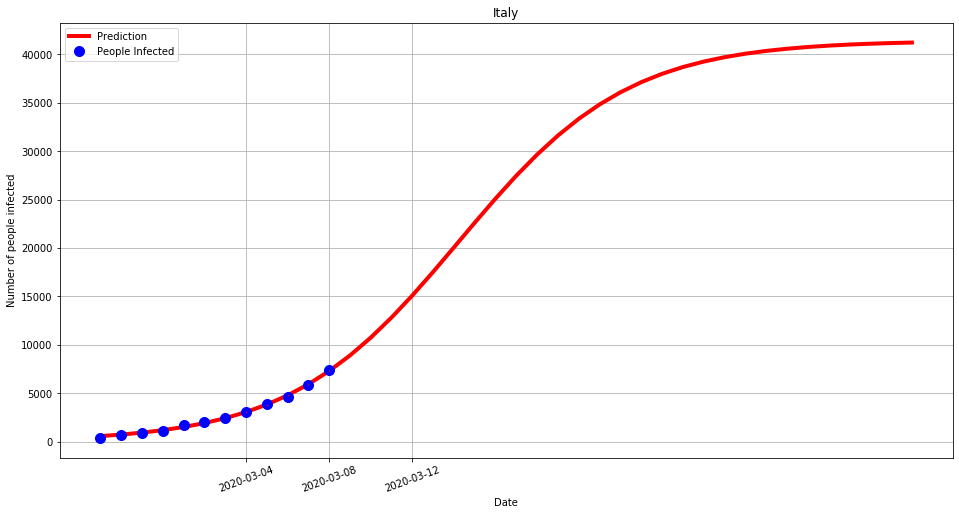

In [27]:
if 0:
    c = 'Italy'
    plt.figure(figsize=(16, 8))
    popt = {}
    print(c)
    df_tmp = df.copy()
    df_tmp = df_tmp[['Date', c]].dropna()
    df_tmp = df_tmp.loc[df_tmp.index > offset[c]]
    df_tmp.index = df_tmp.index-df_tmp.index[0]
    t = np.arange(0, 40)
    popt[c], pcov = curve_fit(m2, df_tmp.index, df_tmp[c])
    y = m2(t, popt[c][0], popt[c][1], popt[c][2])
    y_pred = m2(df_pred[c].index-offset[c]-1, popt[c][0], popt[c][1], popt[c][2])
    df_pred[c] = np.ceil(y_pred)
    #print(popt[c])
    plt.plot(t, y, '-r', linewidth=4, label='Prediction')
    plt.plot(df_tmp['Date'], df_tmp[c], '.b', markersize=20, label='People Infected')
    plt.plot(df_pred['Date'], df_pred[c], '.r', markersize=1)
    #plt.plot(df_pred[c].index-offset[c]-1, y_pred, '*c', markersize=10, label='Prediction')
    plt.title(c)
    plt.xticks(df_pred['Date'].values[::4], rotation=20)
    #plt.yscale('log')
    plt.grid()
    plt.xlabel('Date')
    plt.ylabel('Number of people infected')
    plt.legend()
    plt.savefig('figs/'+c+'.png')